In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [178]:
DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle---s3e1---Regression-with-a-Tabular-California-Housing-Dataset/main/"
df = pd.read_csv(DATA_URL + "train.csv", index_col='id')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


# EDA

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [180]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [181]:
df['MedHouseVal'].value_counts()

MedHouseVal
5.00001    1827
1.62500     215
1.37500     194
1.12500     171
1.87500     169
           ... 
4.18400       1
4.71400       1
4.18500       1
0.79100       1
0.51100       1
Name: count, Length: 3723, dtype: int64

In [182]:
df.shape

(37137, 9)

In [183]:
X = df.copy()

In [184]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

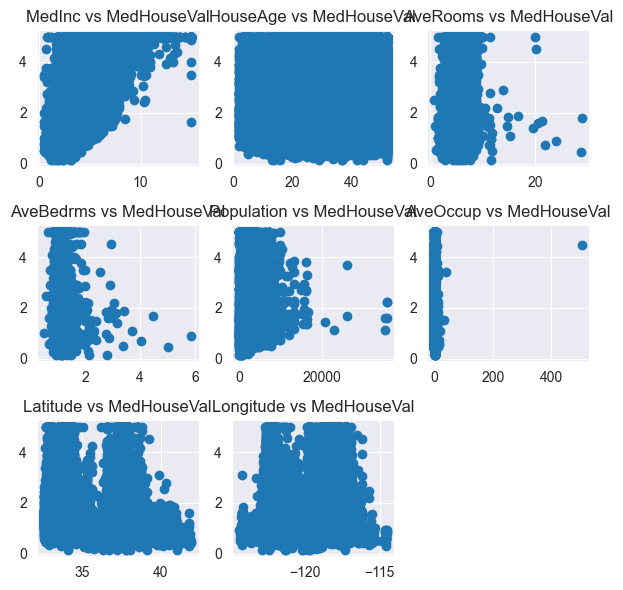

In [185]:
# посмотрим на графике отношение каждого признака к таргету
# Список столбцов для сравнения с 'MedHouseVal'
columns = X.columns.drop('MedHouseVal')

# Количество графиков
n_plots = len(columns)

# Количество графиков в одной строке
n_cols = 3

# Количество строк графиков
n_rows = (n_plots + n_cols - 1) // n_cols

# Создаем фигуру с подходящим размером
plt.figure(figsize=(2 * n_cols, 2 * n_rows))

# Цикл по всем столбцам
for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X[column], X['MedHouseVal'])
    plt.title(f'{column} vs MedHouseVal')

# Отображаем графики
plt.tight_layout()
plt.show()

MedInc vs MedHouseVal: Есть положительная корреляция между средним доходом и стоимостью жилья. С увеличением дохода стоимость жилья также, как правило, растет. Это может быть важным фактором для модели.

HouseAge vs MedHouseVal: Наблюдается некоторая положительная корреляция, но она не так явно выражена. Возможно, старые дома в некоторых районах ценятся выше, но этот тренд не является универсальным.

AveRooms vs MedHouseVal: Есть положительная корреляция, что указывает на то, что дома с большим количеством комнат в среднем стоят дороже. Однако есть выбросы, которые могут указывать на наличие аномалий в данных (например, очень большое количество комнат при низкой стоимости жилья).

AveBedrms vs MedHouseVal: Связь менее выражена, чем с AveRooms, и имеются выбросы. Возможно, этот признак будет менее важным для модели.

Population vs MedHouseVal: Нет четкой зависимости, что указывает на то, что население района, возможно, не сильно влияет на стоимость жилья.

AveOccup vs MedHouseVal: Слабая отрицательная корреляция, но также присутствуют выбросы. Высокая средняя заселенность может быть признаком перенаселенности, что не всегда положительно сказывается на стоимости жилья.

Latitude и Longitude vs MedHouseVal: На графиках видна некоторая географическая зависимость, что ожидаемо, так как стоимость жилья часто зависит от местоположения.

В целом, наиболее интересными для дальнейшей проработки могут быть признаки MedInc, HouseAge, AveRooms и, возможно, географические координаты (Latitude и Longitude). Также стоит обратить внимание на выбросы и рассмотреть возможность их обработки для улучшения качества модели.

In [186]:
# Этот код проверит наличие дубликатов во всем датафрейме
X.duplicated().sum()

0

In [187]:
# проверка на пустые значения
X.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Обработка выбросов: Вы можете использовать методы, такие как IQR (межквартильный размах) или Z-счет, для идентификации и удаления выбросов в данных. Например, для признака AveRooms вы можете удалить значения, которые сильно отклоняются от среднего.

Фильтрация данных: Исключите из анализа записи, которые могут исказить результаты, например, дома с чрезмерно высокой или низкой стоимостью, которые могут быть аномальными.

Преобразование признаков: Используйте логарифмическое преобразование для признаков с сильно искаженным распределением, чтобы сделать их более "нормальными" и улучшить предсказательную способность модели.

Создание новых признаков: Исходя из существующих данных, можно создать новые признаки, которые могут быть полезны для модели. Например, соотношение количества комнат к количеству спален (AveRooms / AveBedrms) может быть интересным показателем.

Использование географических данных: Можно попробовать разбить карту на сектора и использовать категориальные переменные для обозначения разных регионов. Также можно создать признаки, основанные на расстоянии до определенных точек интереса, например, до центра города, парков или школ.

Масштабирование признаков: Приведите все числовые признаки к одному масштабу, используя, например, стандартизацию или нормализацию. Это поможет улучшить производительность некоторых алгоритмов машинного обучения.

Кодирование категориальных переменных: Если у вас есть категориальные переменные, используйте подходы, такие как one-hot encoding или label encoding, для их преобразования в числовой формат.

# Предобработка данных

## Обработать выбросы с использованием метода IQR 

In [188]:
# Вычисляем Q1 (первый квартиль) и Q3 (третий квартиль)
Q1 = df['AveRooms'].quantile(0.25)
Q3 = df['AveRooms'].quantile(0.75)

# Вычисляем межквартильный размах (IQR)
IQR = Q3 - Q1

# Определяем границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, исключая выбросы
filtered_df_AveRooms = df[(df['AveRooms'] >= lower_bound) & (df['AveRooms'] <= upper_bound)]

# Проверяем размер отфильтрованных данных
print("Original DataFrame size:", df.shape)
print("Filtered DataFrame size:", filtered_df_AveRooms.shape)

Original DataFrame size: (37137, 9)
Filtered DataFrame size: (36572, 9)


In [189]:
# Вычисление IQR для AveBedrms
Q1 = filtered_df_AveRooms['AveBedrms'].quantile(0.25)
Q3 = filtered_df_AveRooms['AveBedrms'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
filtered_df = filtered_df_AveRooms[(filtered_df_AveRooms['AveBedrms'] >= lower_bound) & (filtered_df_AveRooms['AveBedrms'] <= upper_bound)]

# Проверка результатов
print("Количество записей до фильтрации:", filtered_df_AveRooms.shape[0])
print("Количество записей после фильтрации:", filtered_df.shape[0])

Количество записей до фильтрации: 36572
Количество записей после фильтрации: 35054


При обработке выбросов важно подходить к задаче с учетом специфики данных и целей исследования. Ваш подход с использованием IQR для фильтрации выбросов является классическим и эффективным методом, но, как вы заметили, он может привести к значительному уменьшению размера датасета. Вот несколько альтернативных подходов, которые могут помочь вам обойтись с выбросами более мягко:

1. Коррекция выбросов вместо исключения
Вместо того чтобы удалять выбросы, вы можете попробовать скорректировать их значения, приближая к границам нормального распределения. Например, значения, выходящие за пределы 1.5 IQR от квартилей, можно заменить на значения этих границ.

2. Преобразование признаков
Применение преобразований к данным может помочь уменьшить влияние выбросов. Например, логарифмирование или применение квадратного корня к данным может сделать распределение более нормальным и уменьшить влияние выбросов.

3. Использование робастных метрик
Вместо исключения выбросов рассмотрите возможность использования робастных (устойчивых) метрик и методов, которые менее чувствительны к выбросам. Например, вместо среднего значения можно использовать медиану для анализа центральной тенденции данных.

4. Использование алгоритмов машинного обучения, устойчивых к выбросам
Некоторые алгоритмы машинного обучения лучше справляются с выбросами, чем другие. Например, деревья решений и ансамблевые методы (случайный лес, градиентный бустинг) обычно менее чувствительны к выбросам в данных.

5. Кластеризация выбросов
Методы кластеризации, такие как DBSCAN, могут помочь идентифицировать и отделить выбросы от основных групп данных. После идентификации вы можете решить, корректировать ли эти данные или обрабатывать их отдельно.

6. Ограничение выбросов
Установите пороги значений для ваших данных, основанные на доменных знаниях или статистическом анализе, и ограничьте выбросы этими порогами. Это позволит сохранить больше данных, избегая слишком радикального уменьшения размера датасета.

## Создание новых признаков

In [190]:
# # Создание копии датафрейма для безопасного добавления нового признака
# filtered_df = filtered_df.copy()
# 
# # Создание нового признака - Соотношение комнат к спальням:
# filtered_df['RoomsToBedrooms'] = filtered_df['AveRooms'] / filtered_df['AveBedrms']
# 
# # Проверка результата
# filtered_df[['AveRooms', 'AveBedrms', 'RoomsToBedrooms']].head()

## Разделим X и y

In [191]:
y = filtered_df['MedHouseVal']
X = filtered_df.drop('MedHouseVal', axis=1)

In [192]:
from sklearn.preprocessing import StandardScaler

# масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразование обратно в датафрейм с сохранением имен столбцов
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Предобработка тестового датасета

In [193]:
# загрузим тестовый датасет

DATA_URL = "https://raw.githubusercontent.com/enpure/kaggle---s3e1---Regression-with-a-Tabular-California-Housing-Dataset/main/"
test = pd.read_csv(DATA_URL + "test.csv", index_col='id')
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [194]:
# предобработаем тестовый датасет, также, как и тренировочный
print(test.duplicated().sum())
print(test.isna().sum())

0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [195]:
# # Создание нового признака - Соотношение комнат к спальням:
# test['RoomsToBedrooms'] = test['AveRooms'] / test['AveBedrms']

In [196]:
# масштабирование
test_scaled = scaler.transform(test)

# Преобразование обратно в датафрейм с сохранением имен столбцов
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

# Модели и обучение

## Использование Optuna и CV

In [175]:
# # использования Optuna и CV
# 
# import optuna
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score
# 
# # Функция для оптимизации
# def objective(trial):
#     # Гиперпараметры для оптимизации
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
#     max_depth = trial.suggest_int('max_depth', 3, 10)
#     
#     # Создание модели с текущими гиперпараметрами
#     model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42, n_jobs=-1)
#     
#     # Кросс-валидация
#     score = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')
#     
#     # Возвращаем среднее значение MSE с отрицательным знаком (так как Optuna минимизирует функцию)
#     return -score.mean()
# 
# # Создание Optuna study и запуск оптимизации
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)
# 
# # Вывод результатов
# print('Лучшие гиперпараметры:', study.best_params)
# print('Лучшее значение MSE:', -study.best_value)

[I 2024-03-22 01:39:49,520] A new study created in memory with name: no-name-c6273d84-c983-4cb4-ad97-288ebaaee3e6
[I 2024-03-22 01:39:50,467] Trial 0 finished with value: 0.5621167714443376 and parameters: {'n_estimators': 360, 'learning_rate': 0.22807101425054407, 'max_depth': 3}. Best is trial 0 with value: 0.5621167714443376.
[I 2024-03-22 01:39:53,764] Trial 1 finished with value: 0.569534194605203 and parameters: {'n_estimators': 302, 'learning_rate': 0.08858809550250277, 'max_depth': 8}. Best is trial 0 with value: 0.5621167714443376.
[I 2024-03-22 01:39:54,097] Trial 2 finished with value: 0.5734661758326748 and parameters: {'n_estimators': 83, 'learning_rate': 0.1529406123524412, 'max_depth': 4}. Best is trial 0 with value: 0.5621167714443376.
[I 2024-03-22 01:39:54,834] Trial 3 finished with value: 0.5666489115482258 and parameters: {'n_estimators': 223, 'learning_rate': 0.2702790950754002, 'max_depth': 4}. Best is trial 0 with value: 0.5621167714443376.
[I 2024-03-22 01:39:57

Лучшие гиперпараметры: {'n_estimators': 419, 'learning_rate': 0.11059305095260873, 'max_depth': 4}
Лучшее значение MSE: -0.5602241912222061


In [176]:
# # Градиентный бустинг (XGBoost)
# xgboost = XGBRegressor(n_estimators=419, learning_rate=0.11059305095260873, max_depth=4, random_state=42, n_jobs=-1)
# xgboost.fit(X_scaled, y)
# y_pred_xgb = xgboost.predict(test_scaled)
# 
# # Создание DataFrame с результатами и сохранение
# submission_xgb = pd.DataFrame({'id': test.index, 'MedHouseVal': y_pred_xgb})
# submission_xgb.to_csv('submission_xgb.csv', index=False)

## Применение K-Fold и ансамбля XGB, LGBM, CatBoost

In [199]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Количество фолдов для кросс-валидации
n_splits = 10

# Создание объекта KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Список для хранения средних RMSE каждой модели
rmse_scores = {'XGBoost': [], 'LightGBM': [], 'CatBoost': []}

# Перебор различных разбиений данных
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # XGBoost
    xgb_model = XGBRegressor(n_estimators=419, learning_rate=0.11059305095260873, max_depth=4, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    rmse_scores['XGBoost'].append(mean_squared_error(y_test, y_pred_xgb, squared=False))

    # LightGBM
    lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
    lgbm_model.fit(X_train, y_train)
    y_pred_lgbm = lgbm_model.predict(X_test)
    rmse_scores['LightGBM'].append(mean_squared_error(y_test, y_pred_lgbm, squared=False))

    # CatBoost
    catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=False)
    catboost_model.fit(X_train, y_train)
    y_pred_catboost = catboost_model.predict(X_test)
    rmse_scores['CatBoost'].append(mean_squared_error(y_test, y_pred_catboost, squared=False))

# Вывод средних RMSE для каждой модели
for model, scores in rmse_scores.items():
    print(f'{model} RMSE: {np.mean(scores)}')

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31548, number of used features: 8
[LightGBM] [Info] Start training from score 2.061842


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31548, number of used features: 8
[LightGBM] [Info] Start training from score 2.059184


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31548, number of used features: 8
[LightGBM] [Info] Start training from score 2.059357


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31548, number of used features: 8
[LightGBM] [Info] Start training from score 2.061818


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.058061


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.062143


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.062100


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.058971


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.058944


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 31549, number of used features: 8
[LightGBM] [Info] Start training from score 2.058243
XGBoost RMSE: 0.5605709655156279
LightGBM RMSE: 0.5605098401920259
CatBoost RMSE: 0.5798357365377858


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Обучение на всем наборе данных

In [200]:
## Обучение моделей на всем тренировочном наборе:
# Обучение XGBoost
xgb_model_full = XGBRegressor(n_estimators=419, learning_rate=0.11059305095260873, max_depth=4, random_state=42, n_jobs=-1)
xgb_model_full.fit(X_scaled, y)

# Обучение LightGBM
lgbm_model_full = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgbm_model_full.fit(X_scaled, y)

# Обучение CatBoost
catboost_model_full = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=False)
catboost_model_full.fit(X_scaled, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 35054, number of used features: 8
[LightGBM] [Info] Start training from score 2.060066


In [201]:
# Предсказания на тестовом наборе и ансамблирование:
# Предсказания моделей на тестовом наборе
y_pred_xgb_full = xgb_model_full.predict(test_scaled)
y_pred_lgbm_full = lgbm_model_full.predict(test_scaled)
y_pred_catboost_full = catboost_model_full.predict(test_scaled)

# Усреднение предсказаний
y_pred_ensemble = (y_pred_xgb_full + y_pred_lgbm_full + y_pred_catboost_full) / 3

In [202]:
# Создание DataFrame с результатами и сохранение
submission_ensemble = pd.DataFrame({'id': test.index, 'MedHouseVal': y_pred_ensemble})
submission_ensemble.to_csv('submission_ensemble.csv', index=False)